# Data Diri

*   Nama : Duwi Purnama Sidik
*   Email : duwi763@gmail.com
*   Alamat Domisili : Kota Malang, Jawa Timur






# Import Library

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib

In [ ]:
!pip install kaggle

# Persiapan Data

## Upload Data

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d himanshuydv11/facial-emotion-dataset

100%|█████████████████████████████████████▉| 1.98G/1.98G [01:58<00:00, 20.7MB/s]
100%|██████████████████████████████████████| 1.98G/1.98G [01:58<00:00, 17.9MB/s]


In [ ]:
!ls

'Lis_Wahyuni_Proyek_Akhir (2).ipynb'   facial-emotion-dataset.zip   kaggle.json


In [ ]:
!unzip facial-emotion-dataset.zip

Archive:  facial-emotion-dataset.zip
  inflating: facial_emotion_dataset/data.csv  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16023~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16029~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16045~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16177~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16183~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16220~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16224~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16284~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16321~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ahegao/cropped_emotions.16361~ahegao.png  
  inflating: facial_emotion_dataset/dataset/Ah

## Dataset

In [ ]:
base_dir = 'facial_emotion_dataset/dataset'
data_dir = os.path.join(base_dir)

In [ ]:
os.listdir(data_dir)

['Ahegao', 'Happy', 'Surprise', 'Angry', 'Sad', 'Neutral']

In [ ]:
classes = ['Sad', 'Angry', 'Surprise', 'Neutral', 'Happy', 'Ahegao']

In [ ]:
def show_image_and_distribution(classes):
    plt.figure(figsize=(15, 6))

    # Menampilkan gambar dari setiap kelas
    for i, class_name in enumerate(classes, 1):
        class_dir = os.path.join(data_dir, class_name)
        img_path = os.path.join(class_dir, os.listdir(class_dir)[0])
        img = mpimg.imread(img_path)

        # Menampilkan gambar
        plt.subplot(2, len(classes), i)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

        # Menghitung jumlah data dalam setiap kelas
        num_samples = len(os.listdir(class_dir))
        plt.subplot(2, len(classes), i+len(classes))
        plt.bar(class_name, num_samples)
        plt.title('Data Distribution')
        plt.xlabel('Class')
        plt.ylabel('Number of Samples')

    plt.tight_layout()
    plt.show()

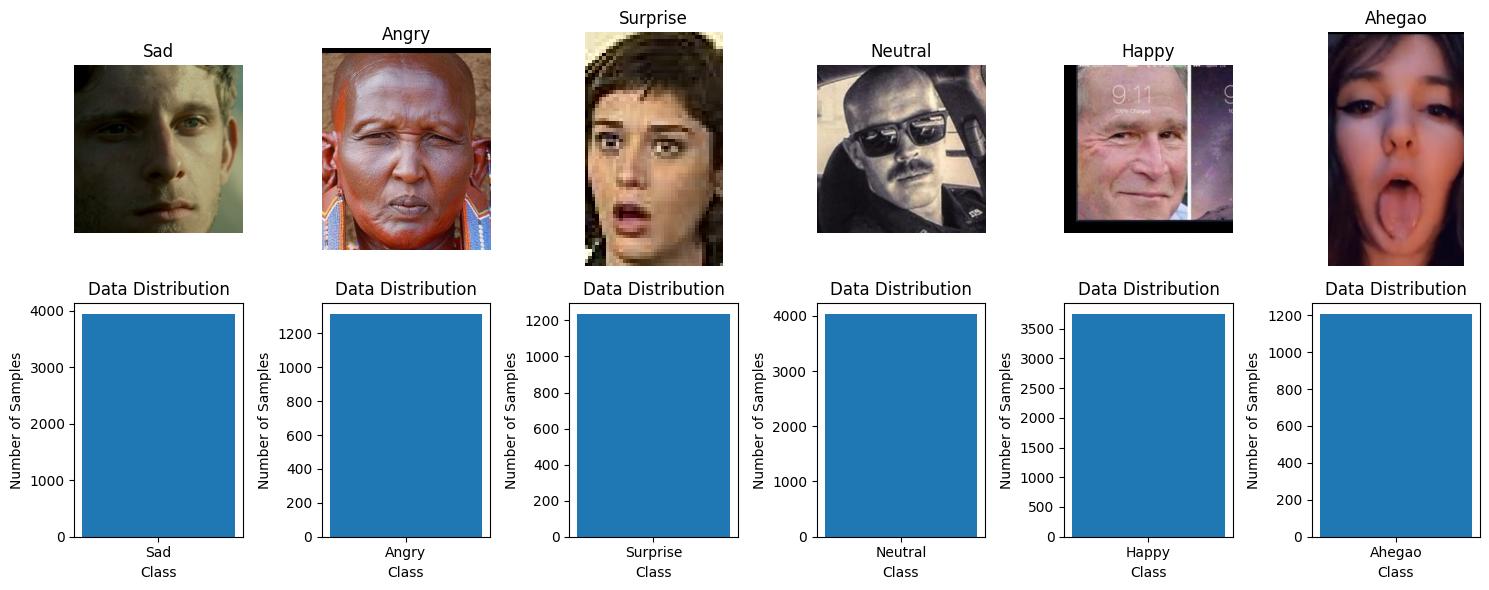

In [ ]:
show_image_and_distribution(classes)

In [ ]:
print('Total ahego images:',len(os.listdir('facial_emotion_dataset/dataset/Ahegao')))
print('Total angry images:',len(os.listdir('facial_emotion_dataset/dataset/Angry')))
print('Total happy images:',len(os.listdir('facial_emotion_dataset/dataset/Happy')))
print('Total neutral images:',len(os.listdir('facial_emotion_dataset/dataset/Neutral')))
print('Total sad images:',len(os.listdir('facial_emotion_dataset/dataset/Sad')))
print('Total surprise images:',len(os.listdir('facial_emotion_dataset/dataset/Surprise')))

Total ahego images: 1205
Total angry images: 1313
Total happy images: 3740
Total neutral images: 4027
Total sad images: 3934
Total surprise images: 1234


# Preprocessing Data

In [ ]:
# Mengambil 3 Class dataset
!mkdir data_fix
!mv facial_emotion_dataset/dataset/Happy data_fix/Happy
!mv facial_emotion_dataset/dataset/Neutral data_fix/Neutral
!mv facial_emotion_dataset/dataset/Sad data_fix/Sad

In [ ]:
img_height = 64
img_width = 64
batch_size = 20

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale=1./255,
  rotation_range=90,
  horizontal_flip=True,
  vertical_flip=True,
  validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "data_fix",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)
val_generator = datagen.flow_from_directory(
    "data_fix",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True,
)

Found 9362 images belonging to 3 classes.
Found 2339 images belonging to 3 classes.


# Modelling

In [ ]:
with tf.device('/GPU:0'):
    model = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2S(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(img_width, img_height, 3))),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 2, 2, 1280)       20331360  
 l)                                                              
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 1280)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               327936    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                      

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
class forCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\n Great! The accuracy from training and validation set is already reach > 98%.")

callbacks = forCallback()

# Training

In [ ]:
history = model.fit(
  train_generator,
  epochs=200,
  validation_data=val_generator,
  validation_steps=4,
  callbacks=[callbacks]
)

Epoch 1/200
469/469 [==============================] - 60s 98ms/step - loss: 1.3068 - accuracy: 0.3605 - val_loss: 1.1977 - val_accuracy: 0.3500
Epoch 2/200
469/469 [==============================] - 44s 93ms/step - loss: 1.1544 - accuracy: 0.3936 - val_loss: 1.0533 - val_accuracy: 0.4500
Epoch 3/200
469/469 [==============================] - 47s 100ms/step - loss: 1.0956 - accuracy: 0.4185 - val_loss: 1.0323 - val_accuracy: 0.4625
Epoch 4/200
469/469 [==============================] - 45s 95ms/step - loss: 1.0497 - accuracy: 0.4533 - val_loss: 1.0277 - val_accuracy: 0.5000
Epoch 5/200
469/469 [==============================] - 44s 93ms/step - loss: 0.9796 - accuracy: 0.5043 - val_loss: 1.0502 - val_accuracy: 0.5125
Epoch 6/200
469/469 [==============================] - 45s 95ms/step - loss: 0.9256 - accuracy: 0.5352 - val_loss: 0.8223 - val_accuracy: 0.6500
Epoch 7/200
469/469 [==============================] - 50s 106ms/step - loss: 0.8660 - accuracy: 0.5747 - val_loss: 0.7565 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



469/469 [==============================] - 49s 105ms/step - loss: 0.0945 - accuracy: 0.9668 - val_loss: 0.8962 - val_accuracy: 0.8000
Epoch 114/200
469/469 [==============================] - 47s 100ms/step - loss: 0.0706 - accuracy: 0.9730 - val_loss: 0.5227 - val_accuracy: 0.8375
Epoch 115/200
469/469 [==============================] - 49s 104ms/step - loss: 0.0715 - accuracy: 0.9745 - val_loss: 0.8374 - val_accuracy: 0.7750
Epoch 116/200
469/469 [==============================] - 44s 94ms/step - loss: 0.0699 - accuracy: 0.9755 - val_loss: 0.7453 - val_accuracy: 0.8000
Epoch 117/200
469/469 [==============================] - 50s 105ms/step - loss: 0.0719 - accuracy: 0.9738 - val_loss: 0.7846 - val_accuracy: 0.7750
Epoch 118/200
469/469 [==============================] - 54s 115ms/step - loss: 0.1018 - accuracy: 0.9627 - val_loss: 0.8035 - val_accuracy: 0.7875
Epoch 119/200
469/469 [==============================] - 46s 97ms/step - loss: 0.0875 - accuracy: 0.9701 - val_loss: 0.4971 - v

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



469/469 [==============================] - 47s 99ms/step - loss: 0.0540 - accuracy: 0.9801 - val_loss: 0.8352 - val_accuracy: 0.7625
Epoch 133/200
469/469 [==============================] - 53s 112ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.9641 - val_accuracy: 0.7250
Epoch 134/200
469/469 [==============================] - 43s 92ms/step - loss: 0.0545 - accuracy: 0.9799 - val_loss: 0.6360 - val_accuracy: 0.7750
Epoch 135/200
469/469 [==============================] - 41s 87ms/step - loss: 0.0656 - accuracy: 0.9784 - val_loss: 0.5585 - val_accuracy: 0.8125
Epoch 136/200
469/469 [==============================] - 41s 86ms/step - loss: 0.0533 - accuracy: 0.9807 - val_loss: 1.1568 - val_accuracy: 0.7750
Epoch 137/200
469/469 [==============================] - 48s 102ms/step - loss: 0.0608 - accuracy: 0.9785 - val_loss: 0.8349 - val_accuracy: 0.7875
Epoch 138/200
358/469 [=====================>........] - ETA: 9s - loss: 0.0599 - accuracy: 0.9779 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



469/469 [==============================] - 44s 93ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 1.0572 - val_accuracy: 0.7000
Epoch 144/200
469/469 [==============================] - 42s 88ms/step - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.7938 - val_accuracy: 0.8125
Epoch 145/200
469/469 [==============================] - 46s 98ms/step - loss: 0.0593 - accuracy: 0.9807 - val_loss: 0.7551 - val_accuracy: 0.7750
Epoch 146/200
469/469 [==============================] - 50s 106ms/step - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.9706 - val_accuracy: 0.6625
Epoch 147/200
469/469 [==============================] - 41s 87ms/step - loss: 0.0473 - accuracy: 0.9836 - val_loss: 0.7739 - val_accuracy: 0.8000
Epoch 148/200
469/469 [==============================] - 44s 93ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.7010 - val_accuracy: 0.8375
Epoch 149/200
469/469 [==============================] - 48s 101ms/step - loss: 0.0497 - accuracy: 0.9828 - val_loss: 0.8641 - val_

# Visualisasi Evaluasi

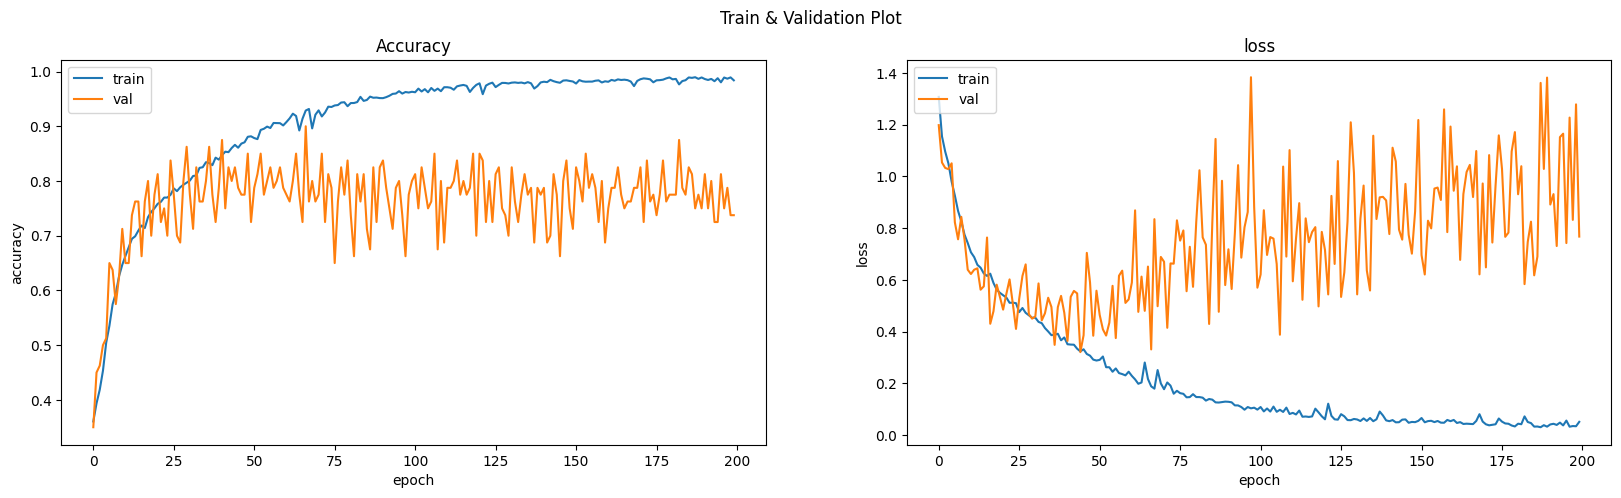

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Train & Validation Plot')
ax1.set_title('Accuracy')
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax2.set_title('loss')
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'val'], loc='upper left')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
plt.show()

# Save Model

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('facial_emotion_classification.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
2024-02-16 11:32:10.373577: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2024-02-16 11:32:10.373780: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2024-02-16 11:32:10.374521: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: saved_model/
2024-02-16 11:32:10.543134: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2024-02-16 11:32:10.543390: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: saved_model/
2024-02-16 11:32:11.042073: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-02-16 11:32:16.414800: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: saved_model/
2024-02-16 11:32:18.234261: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { 

82085464